In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
json_data = open('data.json')

In [4]:
list_data = list()

In [5]:
for line in json_data:
    list_data.append(json.loads(line))

In [6]:
data = list()

In [7]:
for index, d in enumerate(list_data):
    if isinstance(d, dict):
        data.append(d)

In [8]:
data = pd.DataFrame(data)

In [9]:
#data.to_csv('data.csv', index=False)

In [10]:
data.head(1)

,address_components,adr_address,formatted_address,formatted_phone_number,geometry,icon,id,international_phone_number,name,opening_hours,...,price_level,rating,reference,reviews,scope,types,url,utc_offset,vicinity,website
0,"[{'long_name': 'Tiruvallur', 'short_name': 'Ti...","Tiruvallur, <span class=""region"">Tamil Nadu</s...","Tiruvallur, Tamil Nadu 600052, India",NaN,"{'location': {'lat': 13.1881106, 'lng': 80.105...",https://maps.gstatic.com/mapfiles/place_api/ic...,74d53dc696c8048faa9878a7bdf521e3d86eeed0,NaN,Vijaya Bank ATM,"{'open_now': True, 'periods': [{'open': {'day'...",...,NaN,1.0,CmRSAAAAIBmlN3n6nzXiitSUWqDMesrGtOVLaIBbSDd5O6...,"[{'author_name': 'Sachin Bharath', 'author_url...",GOOGLE,"[atm, finance, point_of_interest, establishment]",https://maps.google.com/?cid=12041041824191856539,330,,https://www.vijayabank.com/Digital-Banking/ATM...


In [11]:
address_components = data['address_components']

In [12]:
ac1 = address_components[0]

In [13]:
for a in ac1:
    print(a['long_name'])

Tiruvallur
Tamil Nadu
India
600052


In [14]:
geometry = data['geometry']

In [15]:
geometry[0]

{'location': {'lat': 13.1881106, 'lng': 80.10586669999999},
 'viewport': {'northeast': {'lat': 13.1894595802915, 'lng': 80.1072156802915},
  'southwest': {'lat': 13.1867616197085, 'lng': 80.10451771970848}}}

In [16]:
latitude = []
longitude = []
location = []

for point in geometry:
    lat = point['location']['lat']
    lng = point['location']['lng']
    loc = [lat, lng]
    latitude.append(lat)
    longitude.append(lng)
    location.append(loc)

In [17]:
location = np.array(location)

In [18]:
location

array([[ 13.1881106,  80.1058667],
       [ 13.207488 ,  80.111467 ],
       [ 13.212473 ,  80.088405 ],
       ..., 
       [ 12.8476406,  80.2394521],
       [ 12.8451563,  80.2405934],
       [ 12.8467368,  80.2374288]])

In [20]:
pd.DataFrame(location).to_csv('location.csv', index=False)

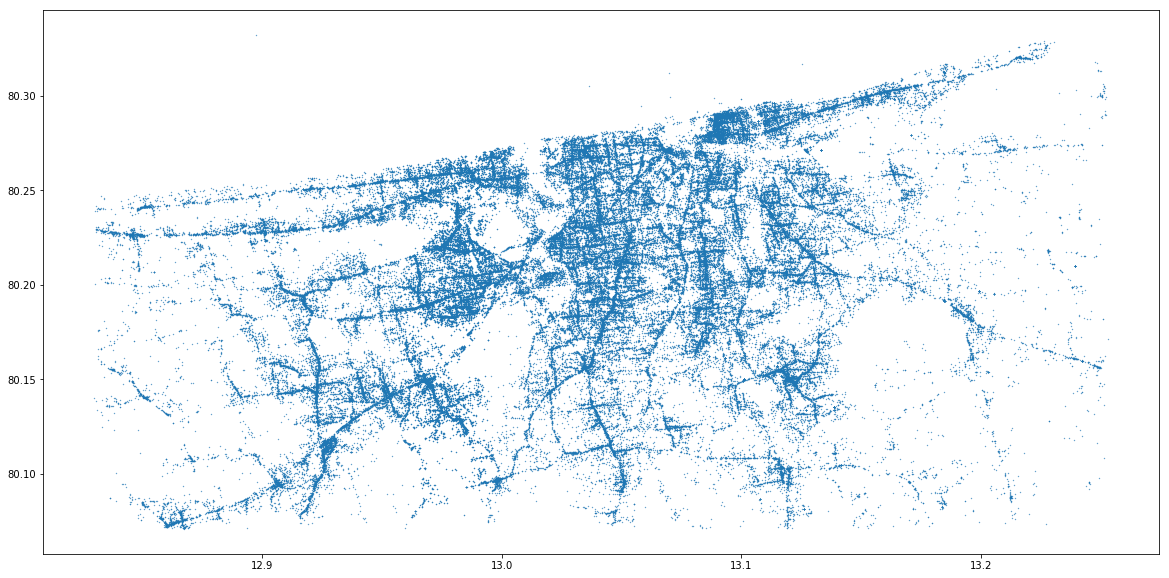

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(latitude, longitude, s=0.1)

# KMeans

In [20]:
kmeans = KMeans(n_clusters=100)
#kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

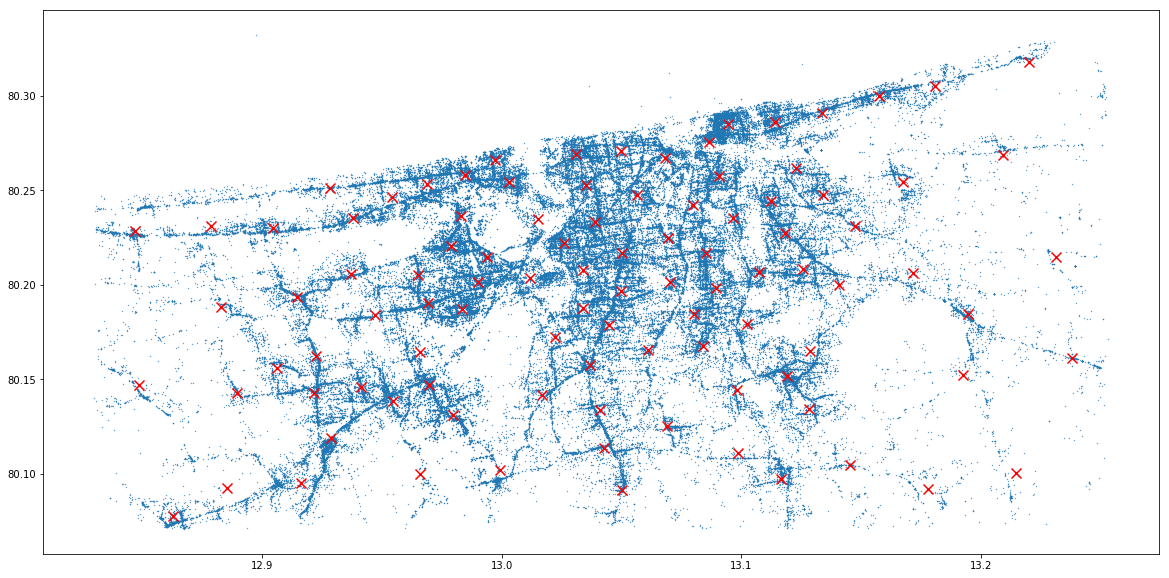

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(latitude, longitude, s=0.1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=10, zorder=100, color='red')

# DBSCAN

In [23]:
#dbs = DBSCAN(eps=0.3, min_samples=5)

# Segregation

In [19]:
from sklearn.preprocessing import LabelEncoder

In [39]:
types = data['types']

In [49]:
cats = pd.DataFrame([cat[0] for cat in types])

In [50]:
cats

,0
0,atm
1,atm
2,atm
3,atm
4,atm
5,atm
6,atm
7,bank
8,bank
9,bank


In [47]:
lb = LabelEncoder()

In [53]:
counts = cats[0].value_counts()

In [60]:
counts

clothing_store        7443
restaurant            6825
lodging               6756
car_repair            6607
hindu_temple          6535
school                6296
atm                   5693
electronics_store     5487
hospital              4582
travel_agency         4333
beauty_salon          4161
real_estate_agency    3575
bus_station           3555
pharmacy              3553
shopping_mall         3525
hardware_store        3496
jewelry_store         3420
doctor                3345
bank                  3195
cafe                  3163
bakery                3161
home_goods_store      3042
hair_care             2992
furniture_store       2549
gym                   2519
store                 2512
shoe_store            2484
dentist               2451
church                2316
insurance_agency      1600
                      ... 
veterinary_care        208
rv_park                145
locksmith              138
liquor_store           136
meal_delivery          125
premise                121
n

In [62]:
for key,value in counts.iteritems():
    print(key)

clothing_store
restaurant
lodging
car_repair
hindu_temple
school
atm
electronics_store
hospital
travel_agency
beauty_salon
real_estate_agency
bus_station
pharmacy
shopping_mall
hardware_store
jewelry_store
doctor
bank
cafe
bakery
home_goods_store
hair_care
furniture_store
gym
store
shoe_store
dentist
church
insurance_agency
laundry
department_store
accounting
park
car_dealer
book_store
local_government_office
mosque
meal_takeaway
storage
gas_station
food
transit_station
bar
lawyer
general_contractor
spa
university
florist
bicycle_store
police
moving_company
pet_store
car_rental
electrician
parking
health
plumber
grocery_or_supermarket
library
car_wash
movie_theater
post_office
physiotherapist
painter
aquarium
roofing_contractor
supermarket
cemetery
art_gallery
museum
veterinary_care
rv_park
locksmith
liquor_store
meal_delivery
premise
night_club
train_station
stadium
finance
embassy
funeral_home
courthouse
fire_station
taxi_stand
place_of_worship
amusement_park
convenience_store
movie_